In [4]:
import numpy as np
import pandas as pd

df=pd.read_csv('data/housing.csv')
df.info()
df.shape
df.first

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<bound method NDFrame.first of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no 

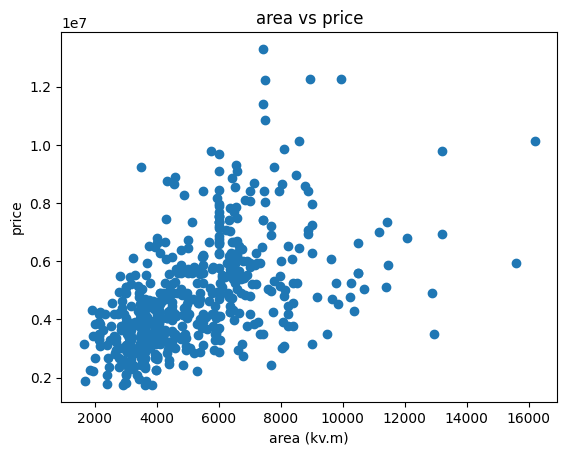

In [7]:
import matplotlib.pyplot as plt
plt.scatter(df['area'],df["price"])
plt.xlabel('area (kv.m)')
plt.ylabel('price')
plt.title('area vs price')
plt.show()

In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

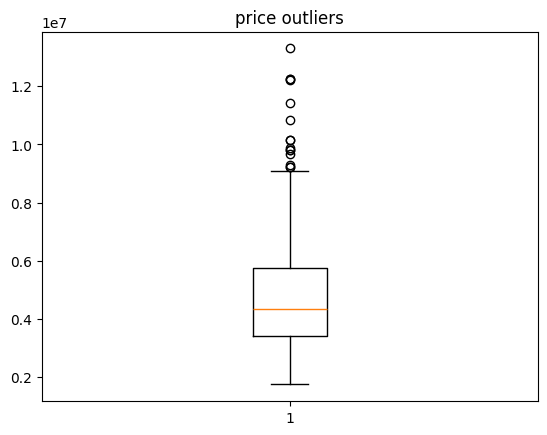

In [9]:
plt.boxplot(df['price'])
plt.title('price outliers')
plt.show()

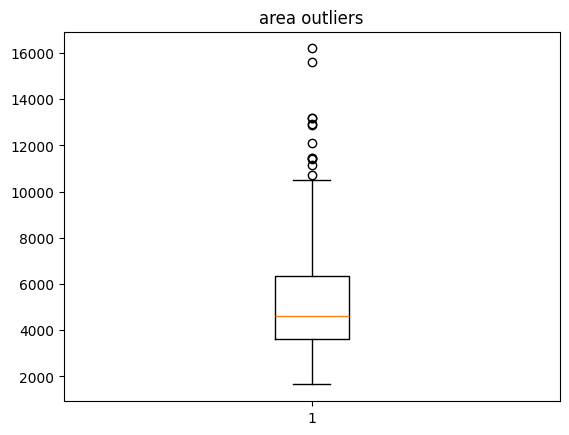

In [11]:
plt.boxplot(df["area"])
plt.title('area outliers')
plt.show()

In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
import numpy as np
df['log_price']=np.log(df['price'])
df['log_area']=np.log(df['area'])


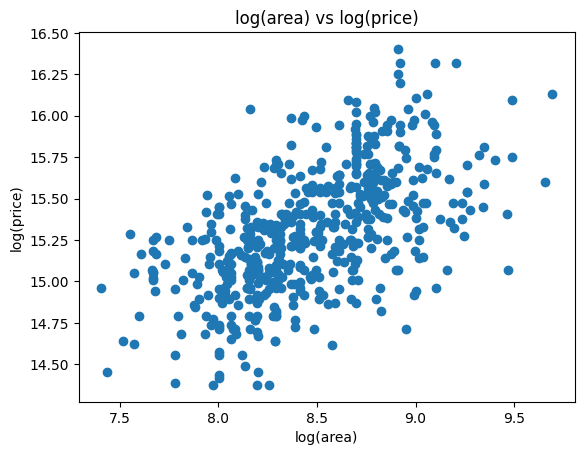

In [17]:
plt.scatter(df['log_area'],df['log_price'])
plt.xlabel('log(area)')
plt.ylabel('log(price)')
plt.title('log(area) vs log(price)')
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X=df[['log_area']]
y=df['log_price']
X_train, X_test, y_train, y_test=train_test_split(
    X,y, test_size=0.2, random_state=42
)
model=LinearRegression()
model.fit(X,y) #type: ignore
beta_0=model.intercept_
beta_1=model.coef_[0]

beta_0, beta_1

(np.float64(10.71774193139953), np.float64(0.5420450769749822))

In [22]:
import numpy as np
x=X_train['log_area'].values
y=y_train.values
x_mean=np.mean(x)
y_mean=np.mean(y)
m=np.sum((x-x_mean)*(y-y_mean))/np.sum((x-x_mean)**2)
b=y_mean-m*x_mean
m,b

(np.float64(0.5136870395858882), np.float64(10.951914476117604))

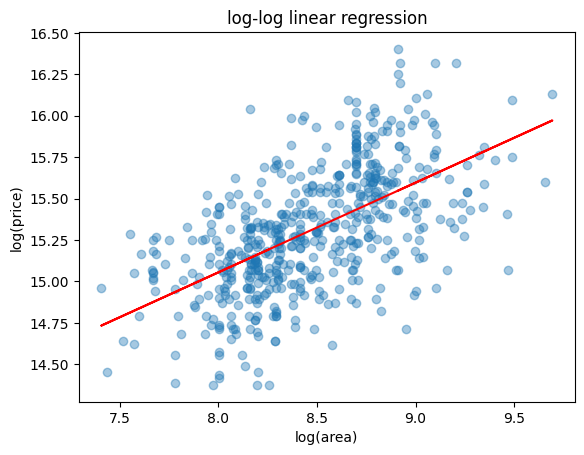

In [33]:
plt.scatter(df['log_area'], df['log_price'], alpha=0.4)
plt.plot(df['log_area'], model.predict(df[['log_area']]), color='red')
plt.xlabel('log(area)')
plt.ylabel('log(price)')
plt.title('log-log linear regression')
plt.show()

In [28]:
y_test_pred=model.predict(X_test)

In [25]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mae=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
r2=r2_score(y_test, y_test_pred)
mae,mse,r2

(0.29492635443861104, 0.1274038781377908, 0.34017963512953786)

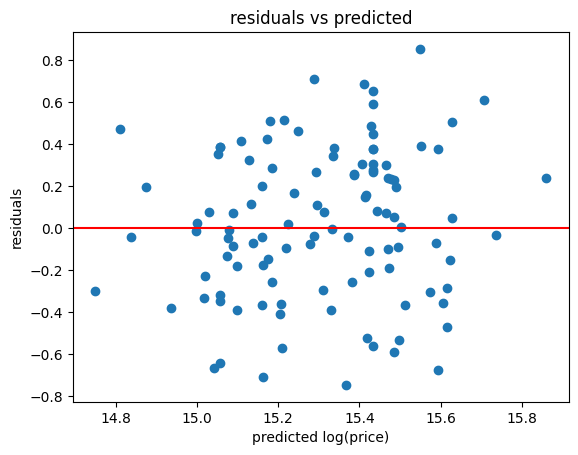

In [29]:
residuals=y_test-y_test_pred
plt.scatter(y_test_pred,residuals)
plt.axhline(0,color='red')
plt.xlabel('predicted log(price)')
plt.ylabel('residuals')
plt.title('residuals vs predicted')
plt.show()

In [32]:
area_1000=np.log(1000)
log_price_pred=model.predict([[area_1000]])
price_pred=np.exp(log_price_pred)
price_pred

c:\Users\i7\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1908936.1843647])